# アップロードしたデータの展開

In [0]:
!unzip -q CT2019.zip

# 学習の実施

train.py の読み込み。train.pyの中に、深層学習に必要なプログラムが記載されている。ここでは、詳細は触れない。

In [0]:
import train

実際の学習の実施。datadirに画像の入ったディレクトリを指定。label_setには、今回の画像に付与してあるクラスを記載。paramsには様々なパラメータを指定。今回はエポック数のみ記載（詳細は後述）。

train.train_and_test で、学習を実施。パラメータを表示の上で、学習がスタートする

In [4]:
datadir = "chest_xray_exe"
label_set = ["NORMAL", "PNEUMONIA"]
params = {
    "epochs":5,
}
final_model, train_loss, val_loss = train.train_and_test(datadir, label_set, params)

Settings:
	Device: cuda
	Batch size: 64
	Epochs: 5
	Learning rate: 0.0001
	Momentum(SGD): 0.9
	Step size for LR: 5
	Gamma for LR: 0.1
	Pretrained model: Use
		Train Mode: Fine Tuning

# of samples:
	Training: 249
	Validation: 16
	Test: 30



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:05<00:00, 9060519.72it/s] 


Epoch:0/4	train Loss: 0.7409 Acc: 0.4900 Time: 5.4148	val Loss: 0.8519 Acc: 0.3125 Time: 0.2750
Epoch:1/4	train Loss: 0.6972 Acc: 0.5341 Time: 5.1197	val Loss: 0.8336 Acc: 0.3125 Time: 0.2713
Epoch:2/4	train Loss: 0.6394 Acc: 0.6225 Time: 5.1355	val Loss: 0.7694 Acc: 0.3750 Time: 0.2711
Epoch:3/4	train Loss: 0.5775 Acc: 0.7349 Time: 5.1310	val Loss: 0.7260 Acc: 0.5000 Time: 0.2717
Epoch:4/4	train Loss: 0.5418 Acc: 0.7992 Time: 5.1279	val Loss: 0.7122 Acc: 0.5625 Time: 0.2733

Training complete in 0m 27s
Best val loss: 0.7122
On Test:	Loss: 0.7486 Acc: 0.5333


## 学習したモデルの保存

学習済みのモデルを best_model.torch というファイル名で保存

In [0]:
import torch
model_file_name = "best_model.torch"
torch.save(final_model.state_dict(), model_file_name)

## 学習の様子の可視化

学習でロスが減少していく様子を可視化

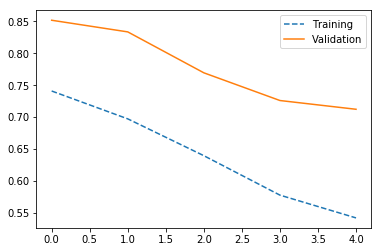

In [7]:
import matplotlib.pyplot as plt
p1 = plt.plot(list(range(len(train_loss))), train_loss, linestyle="dashed")
p2 = plt.plot(list(range(len(val_loss))), val_loss, linestyle="solid")
plt.legend((p1[0], p2[0]), ("Training", "Validation"), loc=1)

## ハイパーパラメータを変更して学習の実施

In [9]:
datadir = "chest_xray_exe"
label_set = ["NORMAL", "PNEUMONIA"]
params = {
    "epochs":30,
    "batch_size":64,
    "lr":0.0001,
    "momentum":0.9,
    "pretrained":True,
    "train_mode":"FT",
    "step_size":8,
    "gamma":0.5
}
final_model, train_loss, val_loss = train.train_and_test(datadir, label_set, params)

Settings:
	Device: cuda
	Batch size: 64
	Epochs: 30
	Learning rate: 0.0001
	Momentum(SGD): 0.9
	Step size for LR: 8
	Gamma for LR: 0.5
	Pretrained model: Use
		Train Mode: Fine Tuning

# of samples:
	Training: 249
	Validation: 16
	Test: 30

Epoch:0/29	train Loss: 0.9269 Acc: 0.4940 Time: 5.3292	val Loss: 0.8327 Acc: 0.5000 Time: 0.2682
Epoch:1/29	train Loss: 0.8346 Acc: 0.4900 Time: 5.1067	val Loss: 0.8080 Acc: 0.3750 Time: 0.2756
Epoch:2/29	train Loss: 0.7334 Acc: 0.5341 Time: 5.1422	val Loss: 0.7716 Acc: 0.3125 Time: 0.2713
Epoch:3/29	train Loss: 0.6341 Acc: 0.6506 Time: 5.1342	val Loss: 0.7528 Acc: 0.3750 Time: 0.2729
Epoch:4/29	train Loss: 0.5851 Acc: 0.6948 Time: 5.1222	val Loss: 0.7512 Acc: 0.5000 Time: 0.2772
Epoch:5/29	train Loss: 0.5372 Acc: 0.7871 Time: 5.1829	val Loss: 0.7440 Acc: 0.5000 Time: 0.2780
Epoch:6/29	train Loss: 0.4863 Acc: 0.8474 Time: 5.1596	val Loss: 0.7215 Acc: 0.5000 Time: 0.2736
Epoch:7/29	train Loss: 0.4453 Acc: 0.8916 Time: 5.1261	val Loss: 0.6925 Acc: 0.5

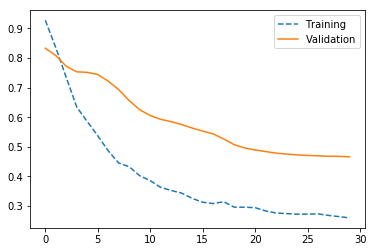

In [11]:
import matplotlib.pyplot as plt
p1 = plt.plot(list(range(len(train_loss))), train_loss, linestyle="dashed")
p2 = plt.plot(list(range(len(val_loss))), val_loss, linestyle="solid")
plt.legend((p1[0], p2[0]), ("Training", "Validation"), loc=1)

## GradCAM: 計算機は何をみて判別したのか

1列目の判定結果が2列目、3列目の判定結果が4列目、、、となっている。

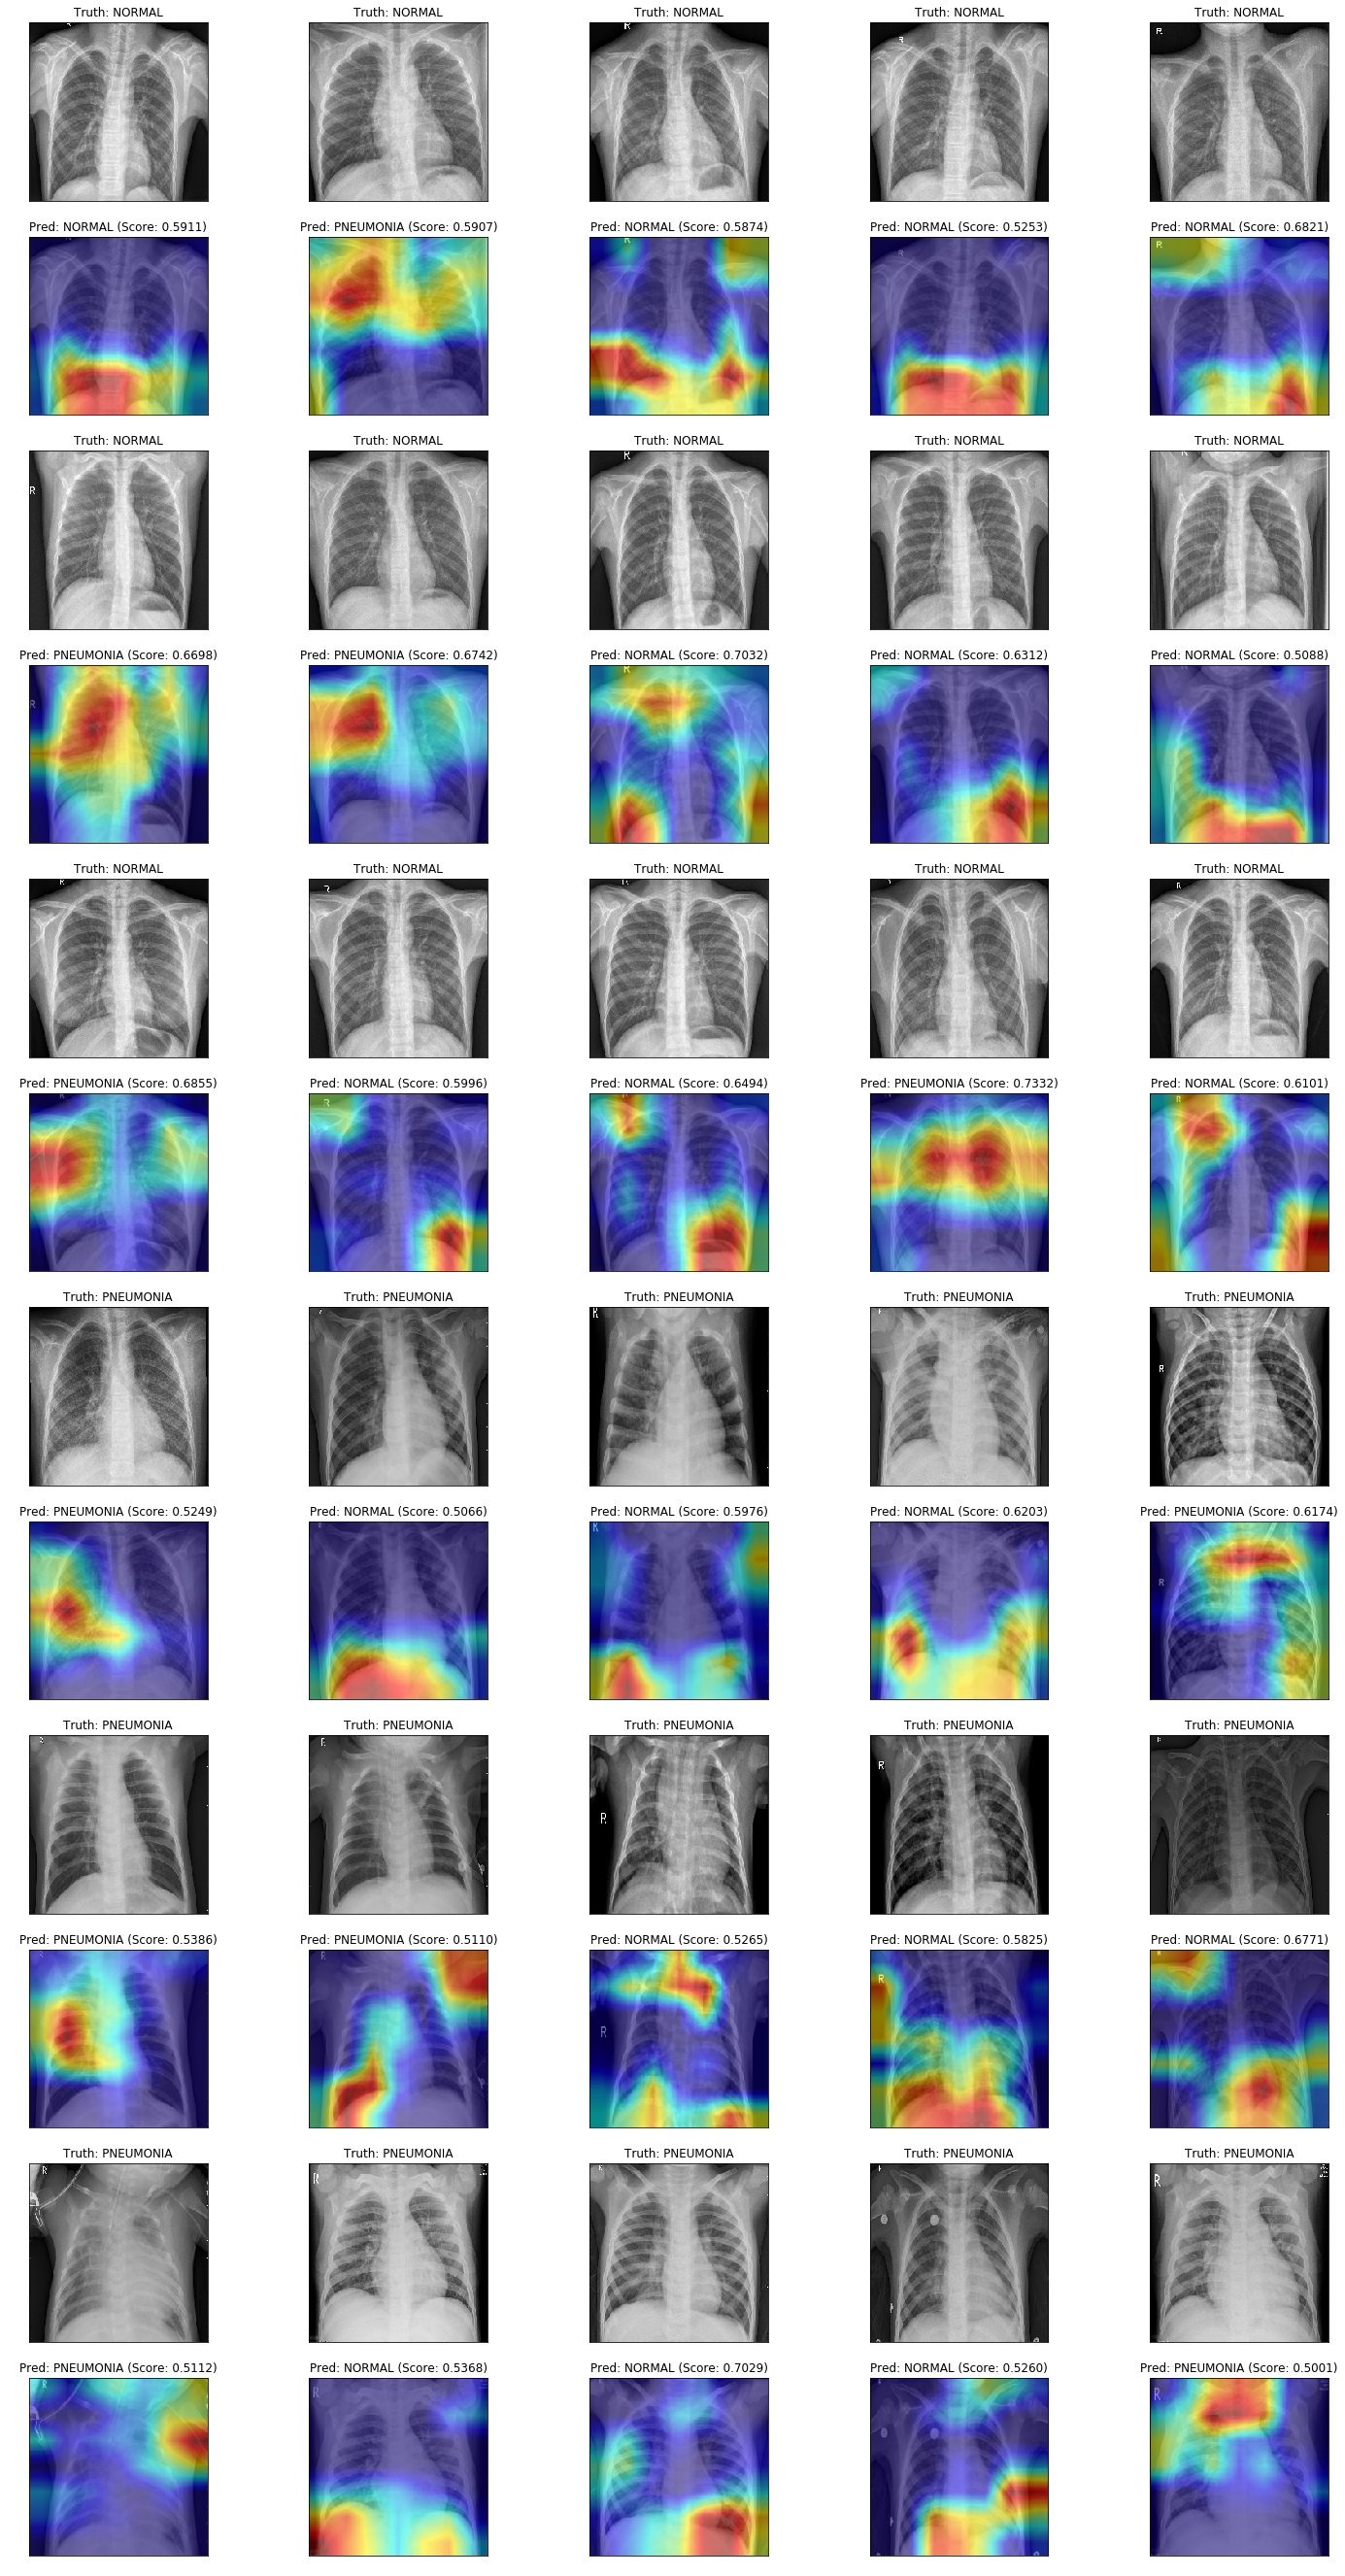

In [10]:
import gradcam
datadir = "chest_xray_exe"
gradcam.run("best_model.torch", datadir)

# データを育てる


*  VoTTに移動して、データのアノテーションを実施
*  chest_xray_exe のディレクトリを圧縮して、左の窓にアップロード
* その後、以下のコマンドを実施する。



In [13]:
# アップロードしたzipの展開
# 今のデータを置き換えるか聞かれるので、"A" を押してリターンキーを押す
!unzip -q chest_xray_exe.zip

replace chest_xray_exe/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## VoTTで選択した部位の切り出し

In [0]:
import convert

In [17]:
# 変換の実施。表示されるのは、VoTTで選択されている領域。確認のために表示。
labels = ["NORMAL", "PNEUMONIA"]
convert.run("chest_xray_exe", "chest_xray_crop", labels)

IM-0125-0001.jpeg {'height': 884.3652950310559, 'width': 1252.8247816593887, 'left': 225.1910480349345, 'top': 110.36824291537268}
IM-0122-0001.jpeg {'height': 825.3215642265194, 'width': 1166.4702510917032, 'left': 233.89296192685592, 'top': 188.2782070096685}
IM-0119-0001.jpeg {'height': 922.4677815082645, 'width': 1338.5429175764193, 'left': 239.9429414574236, 'top': 229.41716167355372}
IM-0117-0001.jpeg {'height': 802.3099730458221, 'width': 1054.7114492358078, 'left': 174.99691252729255, 'top': 145.7466307277628}


## 再度学習を実施する

Settings:
	Device: cuda
	Batch size: 64
	Epochs: 30
	Learning rate: 0.0001
	Momentum(SGD): 0.9
	Step size for LR: 8
	Gamma for LR: 0.5
	Pretrained model: Use
		Train Mode: Fine Tuning

# of samples:
	Training: 249
	Validation: 16
	Test: 30

Epoch:0/29	train Loss: 0.7698 Acc: 0.3855 Time: 5.1464	val Loss: 0.8105 Acc: 0.3125 Time: 0.2708
Epoch:1/29	train Loss: 0.7095 Acc: 0.5141 Time: 5.0247	val Loss: 0.7626 Acc: 0.4375 Time: 0.2874
Epoch:2/29	train Loss: 0.6473 Acc: 0.6145 Time: 5.0461	val Loss: 0.7023 Acc: 0.5625 Time: 0.2752
Epoch:3/29	train Loss: 0.5939 Acc: 0.7068 Time: 5.1231	val Loss: 0.6538 Acc: 0.6250 Time: 0.2750
Epoch:4/29	train Loss: 0.5335 Acc: 0.8193 Time: 5.1217	val Loss: 0.6037 Acc: 0.6250 Time: 0.2765
Epoch:5/29	train Loss: 0.4969 Acc: 0.8233 Time: 5.0921	val Loss: 0.5574 Acc: 0.7500 Time: 0.2794
Epoch:6/29	train Loss: 0.4410 Acc: 0.8916 Time: 4.9832	val Loss: 0.5238 Acc: 0.9375 Time: 0.2750
Epoch:7/29	train Loss: 0.4081 Acc: 0.9076 Time: 5.0363	val Loss: 0.5086 Acc: 0.9

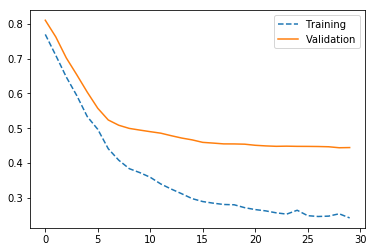

In [18]:
datadir = "chest_xray_crop"
label_set = ["NORMAL", "PNEUMONIA"]
params = {
    "epochs":30,
    "batch_size":64,
    "lr":0.0001,
    "momentum":0.9,
    "pretrained":True,
    "train_mode":"FT",
    "step_size":8,
    "gamma":0.5
}
final_model, train_loss, val_loss = train.train_and_test(datadir, label_set, params)

p1 = plt.plot(list(range(len(train_loss))), train_loss, linestyle="dashed")
p2 = plt.plot(list(range(len(val_loss))), val_loss, linestyle="solid")
plt.legend((p1[0], p2[0]), ("Training", "Validation"), loc=1)

# さらなる精度向上に向けての演習

## 育てる編

1. テスト用のデータでは、学習に必要なデータ量が十分ではないので、元のKaggleのデータをダウンロードし、同様に学習をしてみる。
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
2.ハイパーパラメータの変更を実施し、学習の変化を調査する

## 作る編

1. モデルの変更を実施する。train.py, gradcam.py の中で 現在は ResNet 101 を指定して学習が行われている。このモデルを変更してみる
2. 水増し（Augmentation）の実施。現在は水増しを一切行っていない。人が肺の位置を指定する代わりに、部位をランダムに拡大するような画像処理を実施する水増しの実装を行う。
